In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv' , sep = ',')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# mengganti tipe data objek pada TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tidak ada missing values

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikasi data

In [ ]:
# ngelompokin data numerikal dan kategorikal
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categoricals columns are ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
# saya mau tau, ini kolom masing masing data kategorikal apa, buat nanti ngebandinginnya
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
------------------------------


Value counts for column gender:
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------


Value counts for column Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------


Value counts for column Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------


Value counts for column PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------


Value counts for column MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
------------------------------


Value counts for column InternetServi

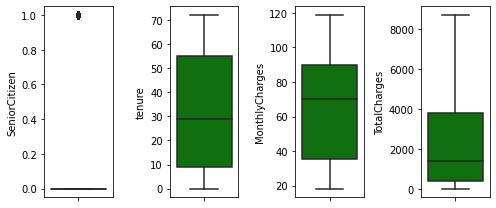

In [ ]:
plt.figure(figsize=(7,3))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green')
    plt.tight_layout()

dari data senior citizen ada outlier, dan datanya sangat timpang

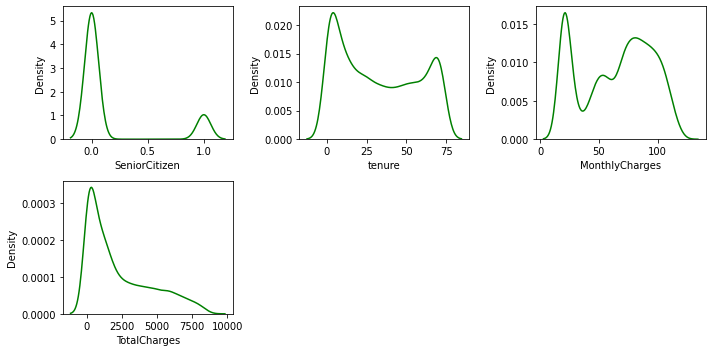

In [ ]:
plt.figure(figsize=(10,5))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

sangat jauh perbedaan antara adanya customer baru dan customer lama, dan jumlah yang baru juga membludak.

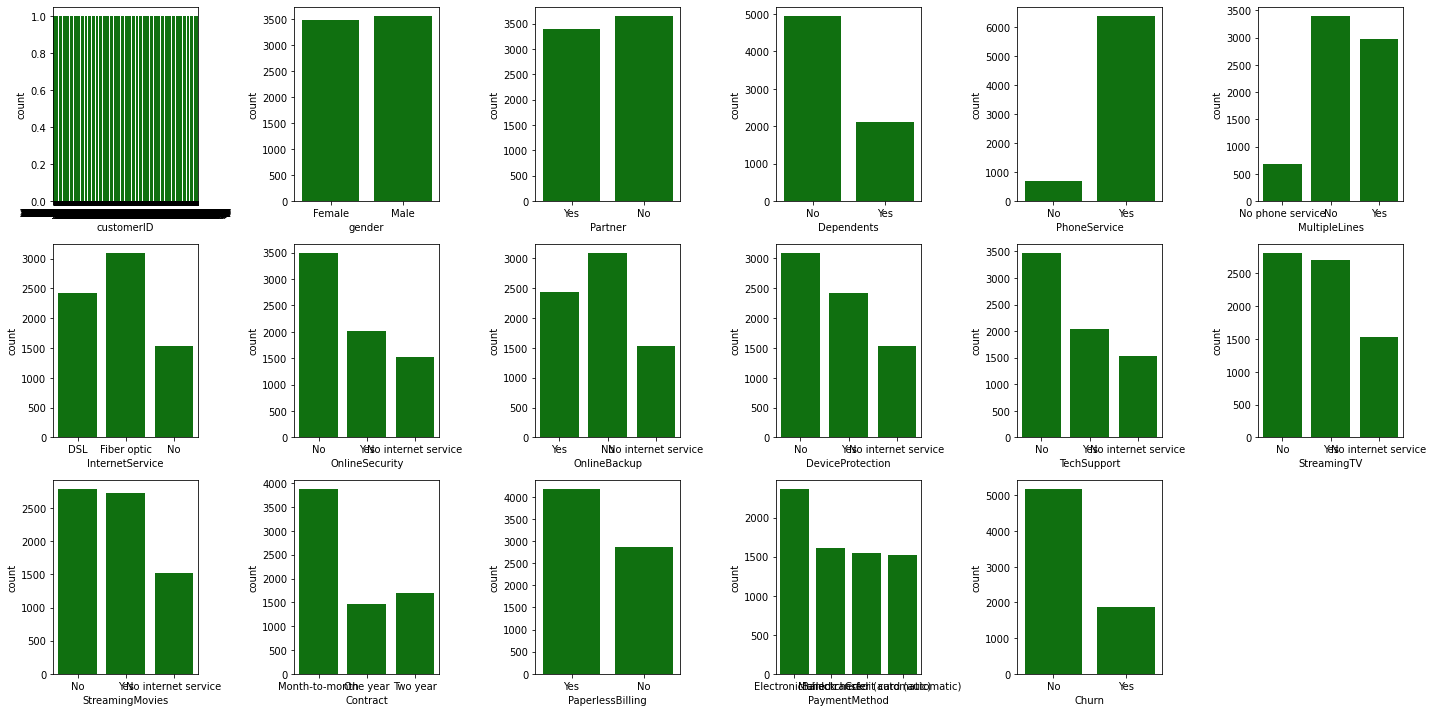

In [ ]:
plt.figure(figsize=(20, 10))

feature = categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    sns.countplot(x=df[features[i-1]], color='green')
    plt.xlabel(features[i-1])
    plt.tight_layout()

Tidak ada hubungan yang jelas

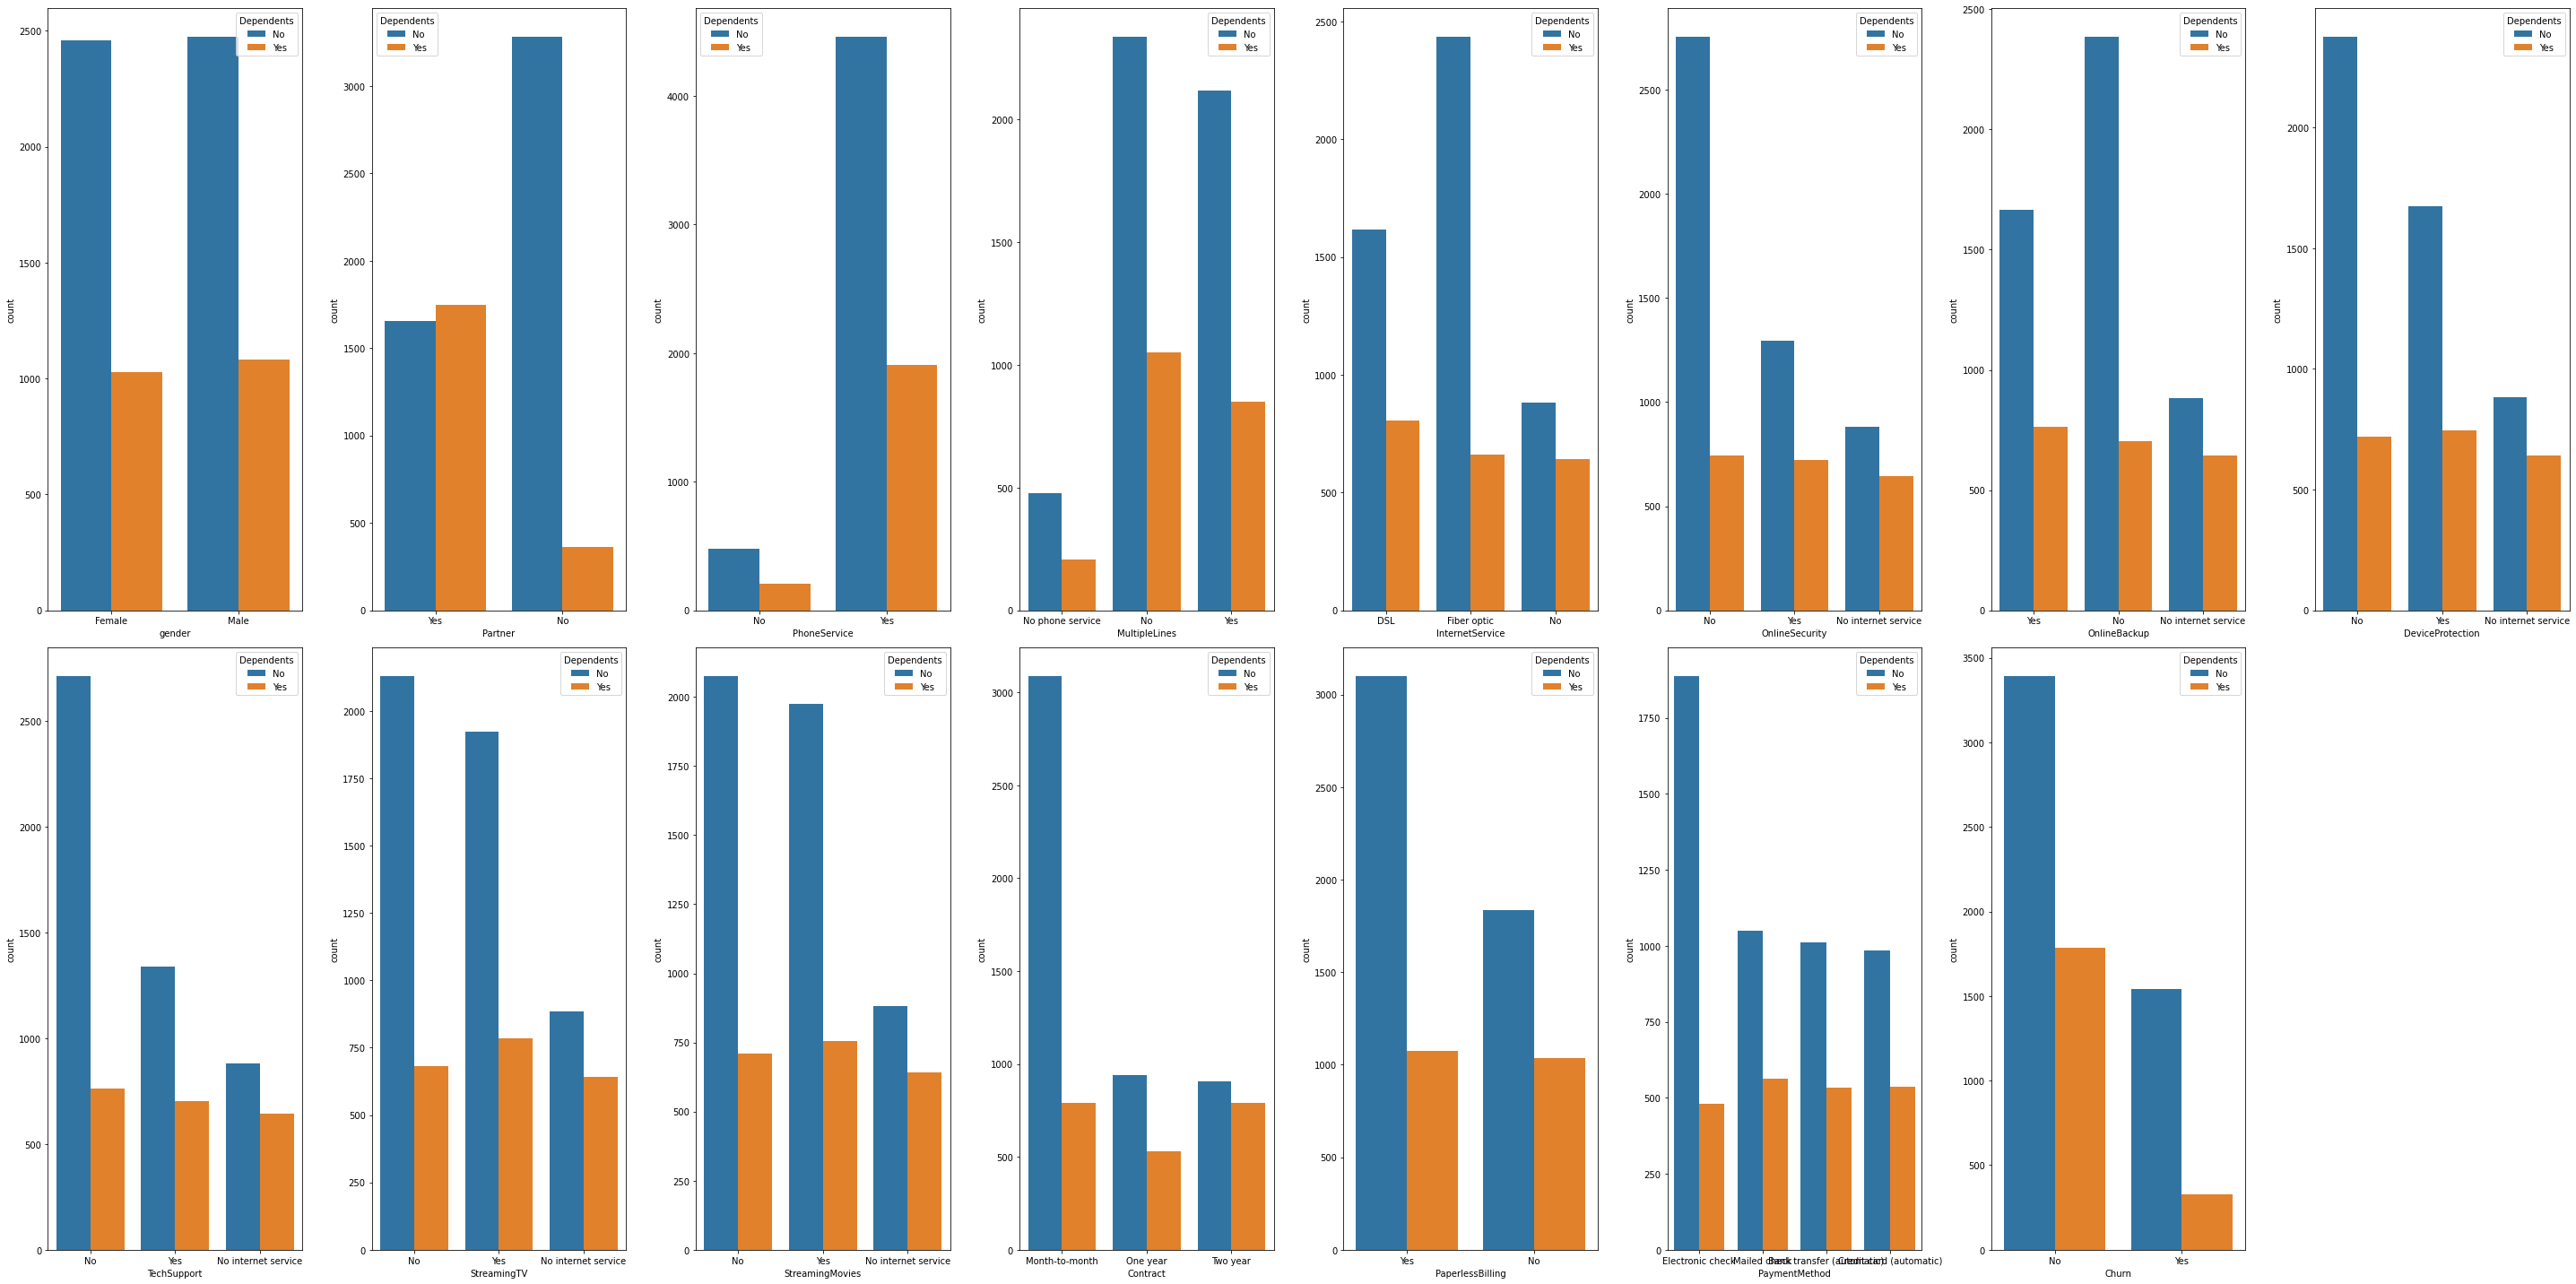

In [ ]:
selected_categoricals = ['gender', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(40,20))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.countplot(x=df[features[i-1]], hue=df['Dependents'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

Kebanyakan pelanggan adalah orang-orang yang tidak memiliki tanggungan

Pada orang yang memiliki partner lebih tinggi orang yang memiliki tanggungan

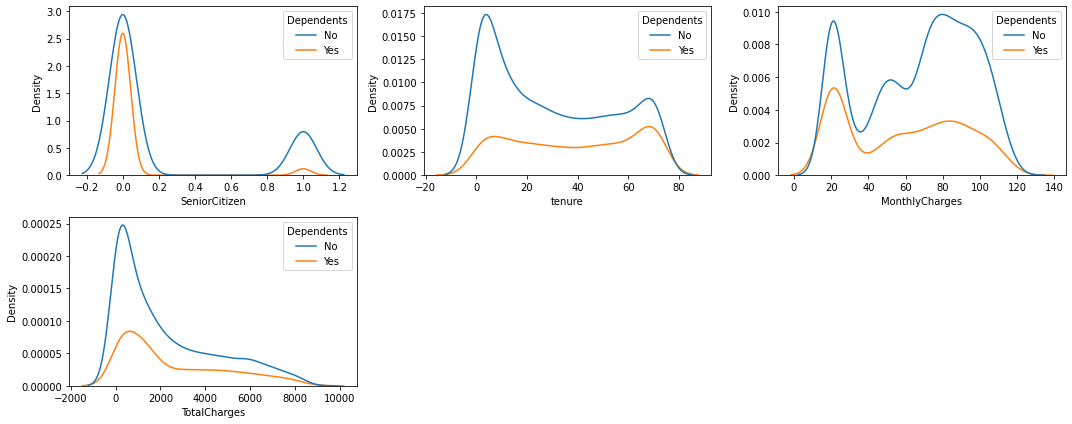

In [ ]:
plt.figure(figsize=(15,6))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.kdeplot(x=df[features[i-1]], hue=df['Dependents'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

Orang yang tidak memiliki tanggungan cenderung lebih banyak mengeluarkan biaya dari pada yang memiliki tanggungan

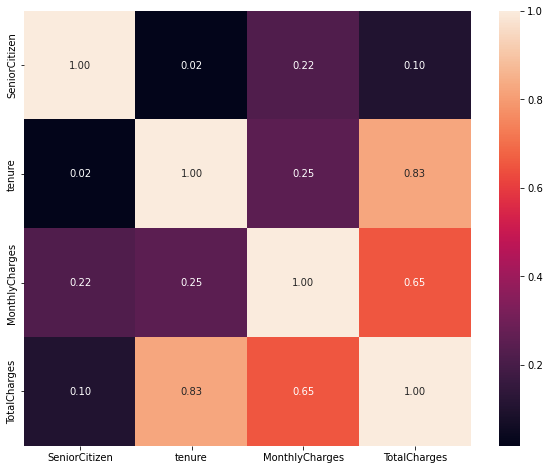

In [ ]:
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Bisa dilihat bahwa Total charges mempunyai korelasi yang kuat terhadap Tenure dan Monthly Charges

In [ ]:
# 1 Siapakah 10 customer ter loyal?
top10_cust = (df
            .groupby('customerID')
            .agg(TotalSpend=('TotalCharges','sum'))
            .reset_index()
            .sort_values('TotalSpend',ascending=False)
            .head(10)
            )

top10_cust

,customerID,TotalSpend
2003,2889-FPWRM,8684.80
5360,7569-NMZYQ,8672.45
6855,9739-JLPQJ,8670.10
6892,9788-HNGUT,8594.40
6275,8879-XUAHX,8564.75
6993,9924-JPRMC,8547.15
462,0675-NCDYU,8543.25
4720,6650-BWFRT,8529.50
95,0164-APGRB,8496.70
1029,1488-PBLJN,8477.70


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

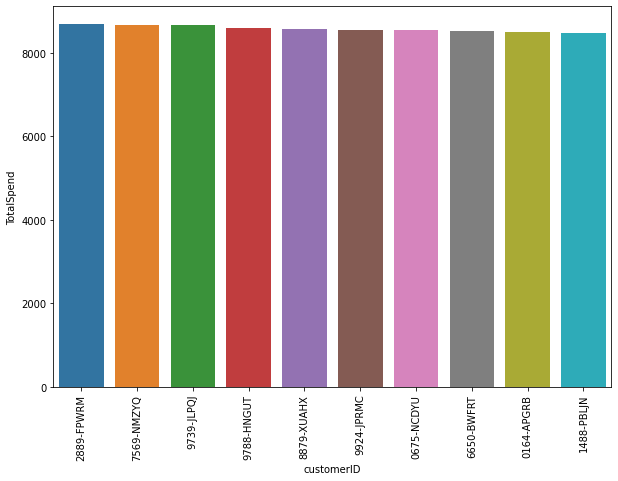

In [ ]:
plt.figure(figsize=(10,7))
top10_cust['customerID'] = top10_cust['customerID'].astype(str)
sns.barplot(data=top10_cust, x='customerID', y='TotalSpend')
plt.xticks(rotation=90)

Penghasilan terbanyak didapatkan dari kontrak yang mana

In [ ]:
MostValueContract = (df
                .groupby(['Contract','customerID'])
                .agg(TotalSpend=('TotalCharges','sum'))
                .reset_index())
MostValueContract.head()

,Contract,customerID,TotalSpend
0,Month-to-month,0003-MKNFE,542.40
1,Month-to-month,0004-TLHLJ,280.85
2,Month-to-month,0011-IGKFF,1237.85
3,Month-to-month,0013-EXCHZ,267.40
4,Month-to-month,0013-MHZWF,571.45


In [ ]:
MostValueContract.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

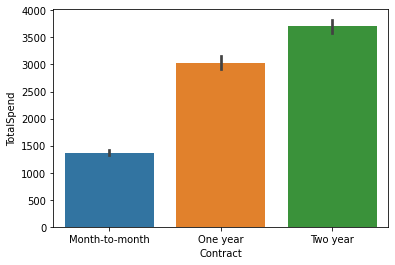

In [ ]:
sns.barplot(data=MostValueContract,
            x='Contract',
            y='TotalSpend')

In [ ]:
Penghasilan terbesar dari yang per 2 tahunan, karena mungkin pembayaran nya dilakukan di awal